## Problem Statement:

Predict A Doctor's Consultation Fee 

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. 

As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [6]:
df = pd.read_excel("Final_Train.xlsx")

In [7]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


### Column Description

- Qualification: Qualification and degrees held by the doctor

- Experience: Experience of the doctor in number of years

- Rating: Rating given by patients

- Profile: Type of the doctor

- Miscellaneous_Info: Extra information about the doctor

- Fees: Fees charged by the doctor (Target Variable)

- Place: Area and the city where the doctor is located.

## Problem Type

- Target variable is Fees

- Solving it as a classification problem

# Checking the data types

In [8]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

## Data types include:

- Object
- Int

### Lets check for duplicate values

In [9]:
df.duplicated().sum()

40

### Some duplicates in the dataset

#### Droping the duplicates

In [10]:
df = pd.DataFrame.drop_duplicates(df)

In [11]:
df.duplicated().sum()

0

### No more duplicates

### Lets check for missing values

In [12]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3262
Place                    2
Profile                  0
Miscellaneous_Info    2581
Fees                     0
dtype: int64

## Some Missing values in the data set:

- Rating --> 3262
- Place --> 2
- Miscellaneous_Info --> 2581

### Visualizing the missing values

<AxesSubplot:>

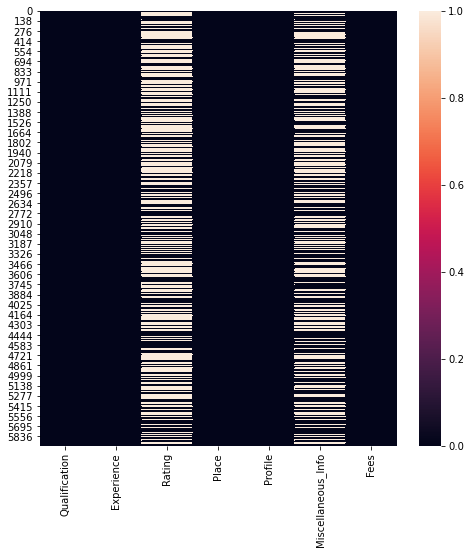

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

### Data Shape

In [14]:
df.shape

(5921, 7)

- Rown : 5921
- Columns : 7

## Feature Engineering

In [15]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


Lets use the split() method in order to split the numerical value from string 

In [16]:
df["Experience"] = df["Experience"].str.split().str[0]

In [17]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


The "Experience" column still has an object data type lets convert it to int

In [18]:
df["Experience"] = df["Experience"].astype(int) 

In [19]:
df["Experience"].dtype

dtype('int32')

We have successfully converted the Data type to Int

In [20]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


Lets remove the "%" sign from "Rating column"

In [21]:
df["Rating"] = df["Rating"].str.split("%").str[0]

In [22]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [23]:
df["Rating"].dtype

dtype('O')

Lets replace all the Nan values in "Rating" with 0

In [24]:
df['Rating'] = df['Rating'].fillna(0)

In [25]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [26]:
df["Rating"].dtype

dtype('O')

we need to convert the "Rating" column to int datatype

In [27]:
df["Rating"] = df["Rating"].astype(int) 

In [28]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [29]:
df["Rating"].mean()

42.50244891065698

In [30]:
df["Qualification"] = df["Qualification"].str.split(",").str[0]

In [31]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS,24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,BAMS,12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,MBBS,9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,BSc - Zoology,12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


Lets Drop the "Miscellaneous_Info" column

In [32]:
df = df.drop("Miscellaneous_Info",axis=1)

In [33]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100,"Kakkanad, Ernakulam",Homeopath,100
1,BAMS,12,98,"Whitefield, Bangalore",Ayurveda,350
2,MBBS,9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,BSc - Zoology,12,0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250


In [34]:
df["Place"].isnull().sum()

2

In [35]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100,"Kakkanad, Ernakulam",Homeopath,100
1,BAMS,12,98,"Whitefield, Bangalore",Ayurveda,350
2,MBBS,9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,BSc - Zoology,12,0,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250


Lets create a new column name "Location" and extract the location from the place column 

In [36]:
df["Location"] = df["Place"].str.split(",").str[0]

In [37]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Location
0,BHMS,24,100,"Kakkanad, Ernakulam",Homeopath,100,Kakkanad
1,BAMS,12,98,"Whitefield, Bangalore",Ayurveda,350,Whitefield
2,MBBS,9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300,Mathikere - BEL
3,BSc - Zoology,12,0,"Bannerghatta Road, Bangalore",Ayurveda,250,Bannerghatta Road
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250,Keelkattalai


Lets create a new column name "City" and extract the City from the place column 

In [38]:
df["City"] = df["Place"].str.split(",").str[1]

In [39]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Location,City
0,BHMS,24,100,"Kakkanad, Ernakulam",Homeopath,100,Kakkanad,Ernakulam
1,BAMS,12,98,"Whitefield, Bangalore",Ayurveda,350,Whitefield,Bangalore
2,MBBS,9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300,Mathikere - BEL,Bangalore
3,BSc - Zoology,12,0,"Bannerghatta Road, Bangalore",Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250,Keelkattalai,Chennai


Now the place column is of no use lets drop the place column

In [40]:
df  = df.drop("Place",axis=1)

In [41]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Location,City
0,BHMS,24,100,Homeopath,100,Kakkanad,Ernakulam
1,BAMS,12,98,Ayurveda,350,Whitefield,Bangalore
2,MBBS,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore
3,BSc - Zoology,12,0,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250,Keelkattalai,Chennai


Replacing the missing values in "Location" and "City" column with Mode()

In [42]:
df['Location'].fillna(df['Location'].mode()[0], inplace=True)

In [43]:
df["Location"].isnull().sum()

0

In [44]:
df['City'].fillna(df['City'].mode()[0], inplace=True)

In [45]:
df["City"].isnull().sum()

0

No more missing values in "Location" and "City"

In [46]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
Location         0
City             0
dtype: int64

In [47]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Location,City
0,BHMS,24,100,Homeopath,100,Kakkanad,Ernakulam
1,BAMS,12,98,Ayurveda,350,Whitefield,Bangalore
2,MBBS,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore
3,BSc - Zoology,12,0,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,250,Keelkattalai,Chennai


Lets find the 20 most frequent categories in Qualification column

In [48]:
df["Qualification"].value_counts().sort_values(ascending=False).head(20)

MBBS                                                  2444
BDS                                                   1202
BAMS                                                   707
BHMS                                                   703
MD - Dermatology                                        84
MS - ENT                                                71
MD - Dermatology                                        62
MD - Homeopathy                                         56
MD - Ayurveda Medicine                                  38
DHMS (Diploma in Homeopathic Medicine and Surgery)      36
MD - General Medicine                                   26
MDS - Oral & Maxillofacial Surgery                      26
MS - Otorhinolaryngology                                25
MDS - Conservative Dentistry & Endodontics              25
DDVL                                                    20
MD - Physician                                          18
MDS - Prosthodontics                                    

In [49]:
quali_20 = [x for x in df["Qualification"].value_counts().sort_values(ascending=False).head(20).index]                                      

In [50]:
quali_20

['MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology ',
 'MS - ENT',
 'MD - Dermatology',
 'MD - Homeopathy',
 'MD - Ayurveda Medicine',
 'DHMS (Diploma in Homeopathic Medicine and Surgery)',
 'MD - General Medicine',
 'MDS - Oral & Maxillofacial Surgery',
 'MS - Otorhinolaryngology',
 'MDS - Conservative Dentistry & Endodontics',
 'DDVL',
 'MD - Physician',
 'MDS - Prosthodontics',
 'DNB - Dermatology & Venereology',
 'Diploma in Otorhinolaryngology (DLO)',
 'MDS - Prosthodontist And Crown Bridge']

Lets make 20 binary variables

In [51]:
for lab in quali_20:
    
    df[lab] = np.where(df["Qualification"] == lab,1 ,0)

In [52]:
Quali_dummy = df[["Qualification"] + quali_20].head(10)

For the "qualification" column we will limit one hot encoding to the 10 most frequent labels of the column

In [53]:
Quali_dummy.head()

,Qualification,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge
0,BHMS,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,BAMS,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,MBBS,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BSc - Zoology,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BAMS,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,Location,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge
0,BHMS,24,100,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,BAMS,12,98,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,MBBS,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,BSc - Zoology,12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BAMS,20,100,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Lets drop the "Qualification" column now

In [55]:
df = df.drop("Qualification",axis=1)

In [56]:
df.head()

,Experience,Rating,Profile,Fees,Location,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge
0,24,100,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,98,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,100,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Lets find the 20 most frequent categories in Location column

In [57]:
df["Location"].value_counts().sort_values(ascending=False).head(20)

HSR Layout           77
Andheri West         70
Dwarka               68
Banjara Hills        63
Mulund West          54
Borivali West        52
Kandivali West       50
Indiranagar          48
Whitefield           47
Malad West           47
Malleswaram          46
Pitampura            45
Andheri East         43
Vileparle West       43
Powai                42
Jubilee Hills        40
Marathahalli         39
Bannerghatta Road    39
Ghatkopar East       38
Bandra West          38
Name: Location, dtype: int64

Lets make a list of the most frequent categories in the variable "Location"

In [58]:
loc_20 = [x for x in df["Location"].value_counts().sort_values(ascending=False).head(20).index]                                      

In [59]:
loc_20

['HSR Layout',
 'Andheri West',
 'Dwarka',
 'Banjara Hills',
 'Mulund West',
 'Borivali West',
 'Kandivali West',
 'Indiranagar',
 'Whitefield',
 'Malad West',
 'Malleswaram',
 'Pitampura',
 'Andheri East',
 'Vileparle West',
 'Powai',
 'Jubilee Hills',
 'Marathahalli',
 'Bannerghatta Road',
 'Ghatkopar East',
 'Bandra West']

Lets make 20 binary variables

In [60]:
for loc in loc_20:
    
    df[loc] = np.where(df["Location"] == loc,1 ,0)

In [61]:
loc_dummy = df[["Location"] + loc_20].head(20)

In [62]:
loc_dummy.head()

,Location,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West
0,Kakkanad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Whitefield,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Mathikere - BEL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bannerghatta Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Keelkattalai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
df.head()

,Experience,Rating,Profile,Fees,Location,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West
0,24,100,Homeopath,100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,98,Ayurveda,350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bannerghatta Road,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,20,100,Ayurveda,250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
df.shape

(5921, 46)

Droping location column

In [65]:
df = df.drop("Location",axis=1)

In [66]:
df.head()

,Experience,Rating,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West
0,24,100,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,98,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,9,0,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,250,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,20,100,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
df["Rating"].describe()

count    5921.000000
mean       42.502449
std        47.372810
min         0.000000
25%         0.000000
50%         0.000000
75%        96.000000
max       100.000000
Name: Rating, dtype: float64

- if values in (0,10) --> Rating = 1
- if values in (11,20) --> Rating = 2
- if values in (21,30) --> Rating = 3
- if values in (31,40) --> Rating = 4
- if values in (41,50) --> Rating = 5
- if values in (51,60) --> Rating = 6
- if values in (61,70) --> Rating = 7
- if values in (71,80) --> Rating = 8
- if values in (81,90) --> Rating = 9
- if values in (91,100) --> Rating = 10

In [68]:
criteria = [df['Rating'].between(0, 10),df['Rating'].between(11, 20),
           df['Rating'].between(21, 30),df['Rating'].between(31, 40),
           df['Rating'].between(41, 50),df['Rating'].between(51, 60),
           df['Rating'].between(61, 70),df['Rating'].between(71, 80),
           df['Rating'].between(81, 90),df['Rating'].between(91, 100)]

values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [69]:
df['Rating'] = np.select(criteria, values)

In [70]:
df.head()

,Experience,Rating,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West
0,24,10,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,10,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,9,1,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12,1,Ayurveda,250,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,20,10,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## EDA

In [71]:
sns.set_theme(style="darkgrid")

In [72]:
df.head()

,Experience,Rating,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West
0,24,10,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,10,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,9,1,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12,1,Ayurveda,250,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,20,10,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Fees', ylabel='Profile'>

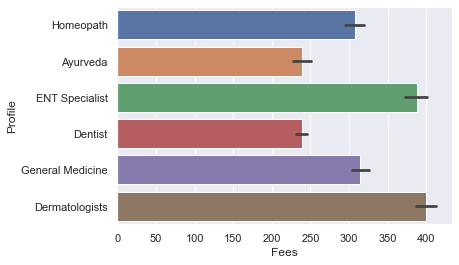

In [73]:
sns.barplot(y="Profile",x="Fees",data=df)

- From the above plot, we can conclude that Dermatologists have higher fees as compared to other Profiles in the medical domain

- Ayurveda and Dentists have lower Fees

- It is also possible that lower the number of patients higher the amount of fees especially if the Doctor is new

- Most people prefer going to a General medicine doctor before going to a specialist

<AxesSubplot:xlabel='Rating', ylabel='Fees'>

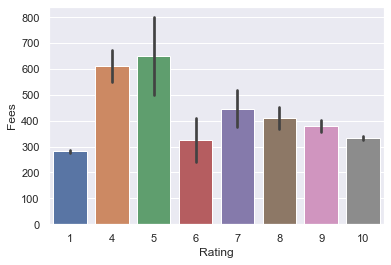

In [74]:
sns.barplot(x="Rating",y="Fees",data=df)

- From the above plot, we can conclude that a higher rating does not mean higher fees

- Some of the doctors who are rated highly are taking fees that are affordable

- Some of the doctors with a low rating are taking higher fees

<AxesSubplot:xlabel='Rating', ylabel='Profile'>

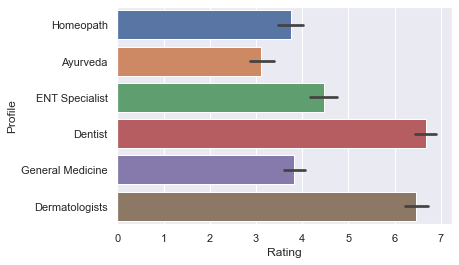

In [75]:
sns.barplot(x="Rating",y="Profile",data=df)

- From the above plot, we can conclude that dentists are given the highest rating as compared to other medical Profiles

- Ayurveda Profile is having the least rating

- We can say that on average people don't often go to a dentist as compared to other medical Profiles. so the average rating can be high for Dentists

- In the case of Ayurveda we can say that due to the advancement in medical science, most people might have a trust issue with Ayurveda so the doctors in Ayurveda might have lesser patients 

<AxesSubplot:xlabel='Rating', ylabel='Experience'>

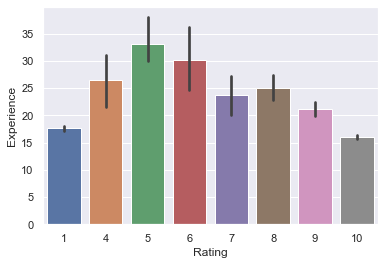

In [76]:
sns.barplot(x="Rating",y="Experience",data=df)

- Normally a more experienced doctor can have a higher rating but not always true

- Sometimes even the most experienced doctors do not have the fame may be for example the doctor resides in a rural area

- Sometimes a doctor with intermediate experience can have a higher rating 

<AxesSubplot:xlabel='Rating', ylabel='City'>

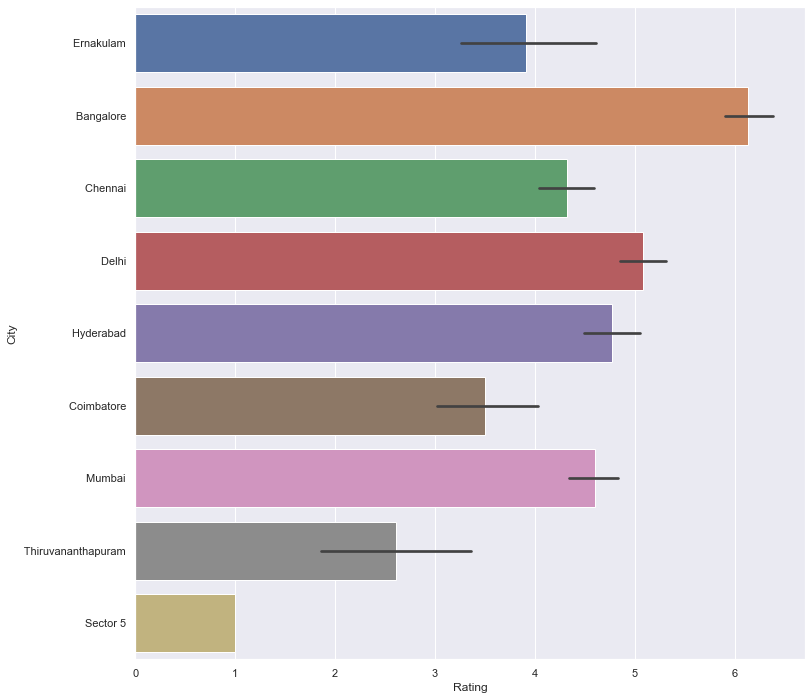

In [77]:
plt.figure(figsize=(12,12))
sns.barplot(x="Rating",y="City",data=df)

From the above plot, we can conclude that Doctor ratings are highest in the city of Bangalore 

Sector 5 has the lowest ratings as compared to other cities

<AxesSubplot:xlabel='Fees', ylabel='City'>

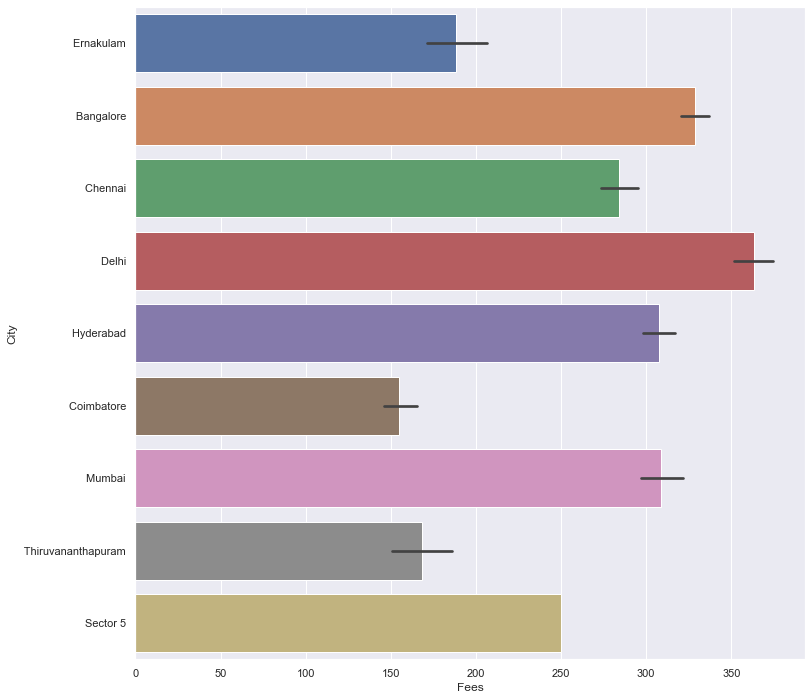

In [78]:
plt.figure(figsize=(12,12))
sns.barplot(x="Fees",y="City",data=df)

From the above plot, we can conclude that clearly observe that Doctor fees are highest in the state of Delhi

Where else Doctor fees are the least in the city of Coimbatore

<AxesSubplot:xlabel='Experience', ylabel='City'>

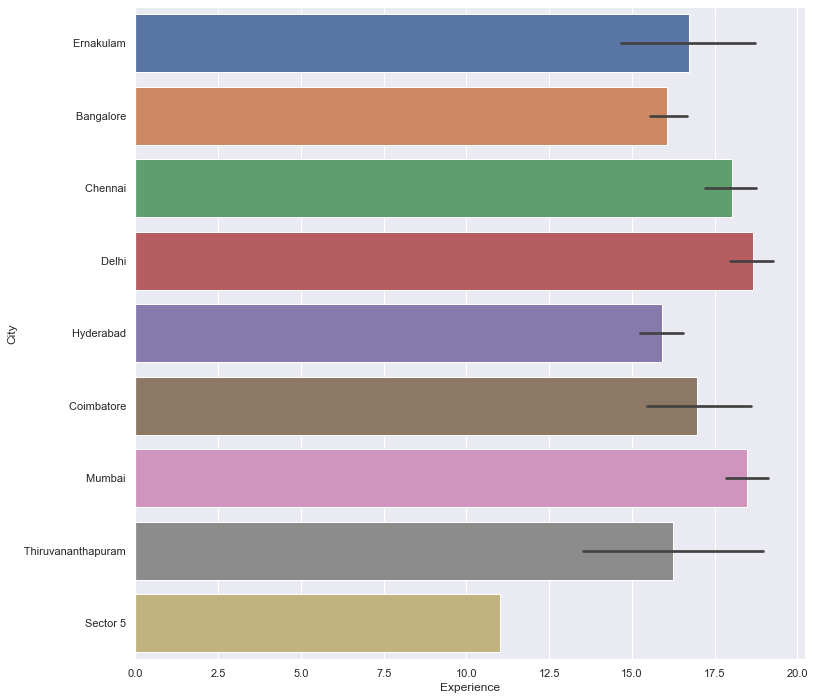

In [79]:
plt.figure(figsize=(12,12))
sns.barplot(x="Experience",y="City",data=df)

- From the above plot, we can clearly observe that the state Delhi and Mumbai are having Doctors with higher experience as compared to other states

- We can say that both Delhi and Mumbai are highly populated countries so there are higher chances of more people becoming doctors 

<AxesSubplot:xlabel='count', ylabel='Profile'>

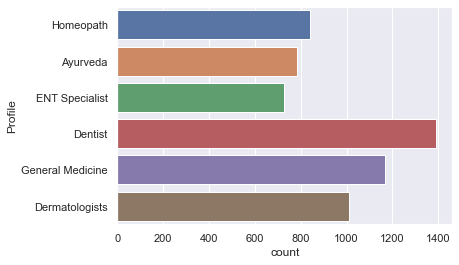

In [80]:
sns.countplot(y="Profile",data=df)

- From the above plot, we can conclude that there are more dentists than any other medical profiles

- There are very few ENT Specialists (Ears, Nose and Throat)

<AxesSubplot:xlabel='Experience', ylabel='Fees'>

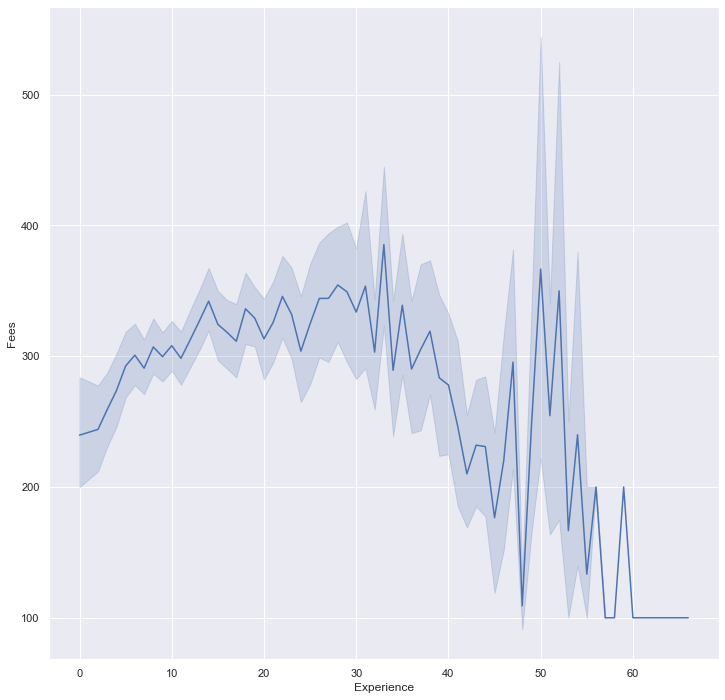

In [81]:
plt.figure(figsize=(12,12))
sns.lineplot(x="Experience",y="Fees",data=df)

Conclusions from the above plot

- The fees are less when the doctor has less experience

- There is a gradual increase in fees after more than 10 years of practice

- There is an exponential decrease in fees as the Doctor gets more than 70 years old 

<AxesSubplot:xlabel='Rating', ylabel='Fees'>

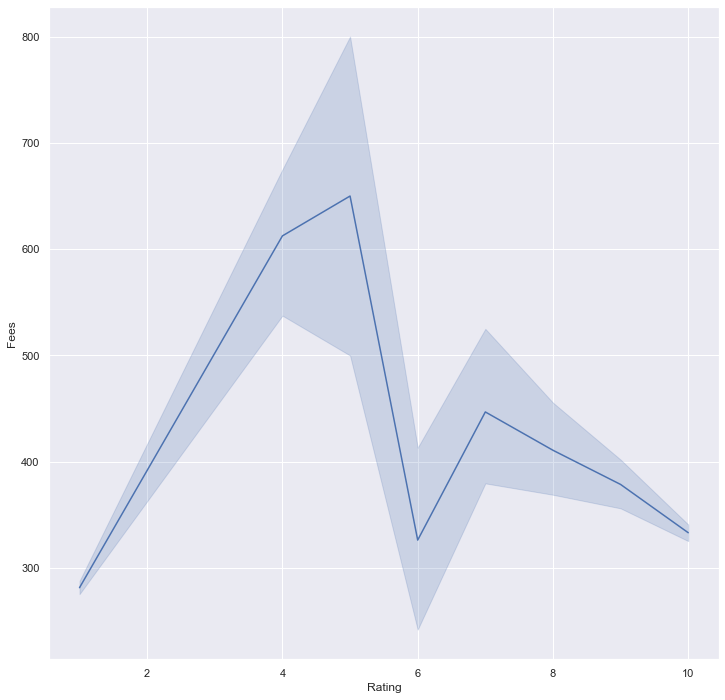

In [82]:
plt.figure(figsize=(12,12))
sns.lineplot(x="Rating",y="Fees",data=df)

Conclusions from the above plot

- Some doctors with a very low rating are taking very high fees

- There are few doctors with very high ratings are taking affordable Fees 

### Encoding

In [83]:
df.head()

,Experience,Rating,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West
0,24,10,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,10,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,9,1,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12,1,Ayurveda,250,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,20,10,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
df_cata = df[["Profile","City"]]

In [85]:
df_cata.head()

,Profile,City
0,Homeopath,Ernakulam
1,Ayurveda,Bangalore
2,ENT Specialist,Bangalore
3,Ayurveda,Bangalore
4,Ayurveda,Chennai


In [86]:
df_cata = pd.get_dummies(data=df_cata,drop_first=True)

In [87]:
df_cata.head()

,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram
0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0


In [88]:
df = pd.concat([df,df_cata],axis=1)

In [89]:
df.head()

,Experience,Rating,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram
0,24,10,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,12,10,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,1,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,12,1,Ayurveda,250,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,10,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [90]:
df.shape

(5921, 58)

Droping "Profile" and "City" column

In [91]:
df = df.drop(["Profile","City"],axis=1)

In [92]:
df.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram
0,24,10,100,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,12,10,350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,1,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,12,1,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,10,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [93]:
df.shape

(5921, 56)

## Outliers

In [94]:
from scipy import stats
# creating function to count outliers
def outliers(cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

In [95]:
outliers("Experience")

The first quartile : 9.0 for Experience
The third quartile : 23.0 for Experience
The IQR : 14.0 for Experience
The left outlier : -12.0 for Experience
The Right outlier : 44.0 for Experience
Left Outliers : 0
Right Outliers : 130


<AxesSubplot:xlabel='Experience'>

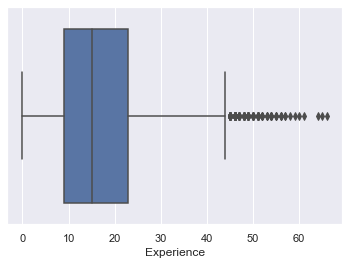

In [96]:
sns.boxplot(x="Experience",data=df)

There are some outliers in Experience

In [97]:
outliers("Rating")

The first quartile : 1.0 for Rating
The third quartile : 10.0 for Rating
The IQR : 9.0 for Rating
The left outlier : -12.5 for Rating
The Right outlier : 23.5 for Rating
Left Outliers : 0
Right Outliers : 0


No outliers in ratings

In [98]:
df_cont = df["Experience"]

In [99]:
df_cont.head()

0    24
1    12
2     9
3    12
4    20
Name: Experience, dtype: int32

## Removing Outliers

#### Z score technique

In [100]:
from scipy.stats import zscore

In [101]:
z = np.abs(zscore(df_cont))

In [102]:
z.shape

(5921,)

In [103]:
threshhold = 3
print(np.where(z > 3))

(array([ 105,  110,  183,  325,  372,  896, 1003, 1104, 1852, 1973, 2015,
       2054, 2192, 2252, 2271, 2619, 3167, 3462, 3477, 3590, 3922, 3940,
       4143, 4188, 4232, 4319, 4733, 4745, 5232, 5244, 5377, 5388, 5551,
       5601, 5628, 5683, 5767, 5902], dtype=int64),)


In [104]:
df_new = df[(z < 3)]
print(df.shape)
print(df_new.shape)

(5921, 56)
(5883, 56)


### Percentage data loss 

In [105]:
loss = (5921-5883)/5921*100

In [106]:
print("The data loss is ",round(loss,1)," %")

The data loss is  0.6  %


we can go ahead with 0.6% data loss

In [107]:
df_new.shape

(5883, 56)

In [108]:
df_new.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram
0,24,10,100,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,12,10,350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,1,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,12,1,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,10,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Skewness

In [109]:
df_new["Experience"].skew()

0.9048848655373404

In [110]:
df_new["Rating"].skew()

0.2254498832788724

The skewness has been reduced 

## Feature Engineering

In [111]:
df = df_new

In [112]:
df.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram
0,24,10,100,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,12,10,350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,1,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,12,1,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,10,250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [113]:
df["Fees"].describe()

count    5883.000000
mean      309.775285
std       190.953643
min         5.000000
25%       150.000000
50%       300.000000
75%       500.000000
max       950.000000
Name: Fees, dtype: float64

Conditions for classification of target variable
- 0 = 0 - 200
- 1 = 200 - 400
- 2 = 400 - 600
- 3 = 600 - 800
- 4 = > 800 

In [114]:
criteria = [df['Fees'].between(0, 200), df['Fees'].between(201, 400), 
            df['Fees'].between(401, 600),df['Fees'].between(601, 800),
           df['Fees'].between(801,1000)]
values = [0, 1, 3, 4, 5]

In [115]:
df['Fees'] = np.select(criteria, values)

In [116]:
df.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram
0,24,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,12,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [117]:
df["Fees"].value_counts()

0    2535
1    1740
3    1235
4     352
5      21
Name: Fees, dtype: int64

## Train Test Split

In [118]:
df.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram
0,24,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,12,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [119]:
X = df.drop("Fees",axis=1)
y = df["Fees"]

In [120]:
X.head()

,Experience,Rating,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram
0,24,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,12,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [121]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Fees, dtype: int32

In [122]:
X = X.values

In [123]:
X

array([[24, 10,  0, ...,  0,  0,  0],
       [12, 10,  0, ...,  0,  0,  0],
       [ 9,  1,  1, ...,  0,  0,  0],
       ...,
       [41, 10,  1, ...,  0,  0,  0],
       [15,  9,  1, ...,  1,  0,  0],
       [17, 10,  0, ...,  0,  0,  0]], dtype=int32)

In [124]:
y = y.values

In [125]:
y

array([0, 1, 1, ..., 3, 0, 0])

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [128]:
X_train

array([[26,  1,  1, ...,  0,  0,  0],
       [ 5, 10,  0, ...,  0,  0,  0],
       [21, 10,  0, ...,  0,  0,  0],
       ...,
       [20, 10,  1, ...,  0,  0,  0],
       [15, 10,  0, ...,  1,  0,  0],
       [32,  1,  1, ...,  0,  0,  0]], dtype=int32)

In [129]:
X_test

array([[11, 10,  1, ...,  0,  0,  0],
       [ 9, 10,  0, ...,  0,  0,  0],
       [38,  1,  0, ...,  0,  0,  0],
       ...,
       [11,  1,  1, ...,  0,  0,  0],
       [13,  1,  1, ...,  0,  0,  0],
       [14, 10,  0, ...,  0,  0,  0]], dtype=int32)

## Scaling

In [130]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
sc = MinMaxScaler()

In [132]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
X_train

array([[0.52, 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.1 , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.42, 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.4 , 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.3 , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.64, 0.  , 1.  , ..., 0.  , 0.  , 0.  ]])

In [134]:
X_test

array([[0.22, 1.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.18, 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.76, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.22, 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.26, 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.28, 1.  , 0.  , ..., 0.  , 0.  , 0.  ]])

## Machine Learning

#### Logistic regression

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [137]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mod_1 = LogisticRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = accuracy_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")


for random state  0  The training accuracy is : 0.5194269062651773
for random state  0  The testing accuracy is : 0.49178470254957507


for random state  1  The training accuracy is : 0.5106847984458475
for random state  1  The testing accuracy is : 0.49971671388101985


for random state  2  The training accuracy is : 0.5048567265662943
for random state  2  The testing accuracy is : 0.5082152974504249


for random state  3  The training accuracy is : 0.5211267605633803
for random state  3  The testing accuracy is : 0.5019830028328612


for random state  4  The training accuracy is : 0.5065565808644973
for random state  4  The testing accuracy is : 0.5206798866855524


for random state  5  The training accuracy is : 0.513598834385624
for random state  5  The testing accuracy is : 0.49971671388101985


for random state  6  The training accuracy is : 0.5099562894609033
for random state  6  The testing accuracy is : 0.5019830028328612


for random state  7  The training accuracy is : 0.513

for random state  60  The training accuracy is : 0.5128703254006799
for random state  60  The testing accuracy is : 0.4951841359773371


for random state  61  The training accuracy is : 0.5155415250121418
for random state  61  The testing accuracy is : 0.49291784702549574


for random state  62  The training accuracy is : 0.5143273433705683
for random state  62  The testing accuracy is : 0.5008498583569405


for random state  63  The training accuracy is : 0.5133559980573094
for random state  63  The testing accuracy is : 0.4906515580736544


for random state  64  The training accuracy is : 0.5075279261777562
for random state  64  The testing accuracy is : 0.5104815864022663


for random state  65  The training accuracy is : 0.5126274890723652
for random state  65  The testing accuracy is : 0.5059490084985836


for random state  66  The training accuracy is : 0.5177270519669742
for random state  66  The testing accuracy is : 0.5076487252124646


for random state  67  The training accur

In [138]:
# Taking best random state as 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
mod_1 = LogisticRegression()
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = accuracy_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)


The training accuracy is : 0.5048567265662943
The testing accuracy is : 0.5082152974504249


In [139]:
print(confusion_matrix(y_test,pred_1))
print("\n")
print(classification_report(y_test,pred_1))
print("\n")

[[601  98  52   7   0]
 [263 207  56   1   0]
 [171 117  81   6   0]
 [ 31  23  35   8   0]
 [  4   2   2   0   0]]


              precision    recall  f1-score   support

           0       0.56      0.79      0.66       758
           1       0.46      0.39      0.43       527
           3       0.36      0.22      0.27       375
           4       0.36      0.08      0.13        97
           5       0.00      0.00      0.00         8

    accuracy                           0.51      1765
   macro avg       0.35      0.30      0.30      1765
weighted avg       0.48      0.51      0.47      1765





## Stratified Validation

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [141]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [142]:
kfold_accuracy_LR

0.4997464860307451

In [143]:
score = {"Algorithm":["Logistic Regression"],
         "Training_Acc":[train_score_1],
        "Accuracy":[test_score_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [144]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.504857,0.508215,0.499746


##  Random_forest_classification

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mod_3 = RandomForestClassifier() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = accuracy_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 0.8409422049538611
for random state  0  The testing accuracy is : 0.4577903682719547


for random state  1  The training accuracy is : 0.8426420592520641
for random state  1  The testing accuracy is : 0.45609065155807366


for random state  2  The training accuracy is : 0.8428848955803788
for random state  2  The testing accuracy is : 0.45892351274787535


for random state  3  The training accuracy is : 0.8370568237008257
for random state  3  The testing accuracy is : 0.4594900849858357


for random state  4  The training accuracy is : 0.837542496357455
for random state  4  The testing accuracy is : 0.4651558073654391


for random state  5  The training accuracy is : 0.838513841670714
for random state  5  The testing accuracy is : 0.45382436260623227


for random state  6  The training accuracy is : 0.8365711510441962
for random state  6  The testing accuracy is : 0.47422096317280454


for random state  7  The training accuracy is : 0.838

for random state  60  The training accuracy is : 0.8411850412821759
for random state  60  The testing accuracy is : 0.46458923512747874


for random state  61  The training accuracy is : 0.8428848955803788
for random state  61  The testing accuracy is : 0.46118980169971674


for random state  62  The training accuracy is : 0.8394851869839728
for random state  62  The testing accuracy is : 0.4470254957507082


for random state  63  The training accuracy is : 0.8355998057309374
for random state  63  The testing accuracy is : 0.47195467422096316


for random state  64  The training accuracy is : 0.8438562408936376
for random state  64  The testing accuracy is : 0.4572237960339943


for random state  65  The training accuracy is : 0.8394851869839728
for random state  65  The testing accuracy is : 0.46175637393767704


for random state  66  The training accuracy is : 0.8443419135502671
for random state  66  The testing accuracy is : 0.45609065155807366


for random state  67  The training a

In [147]:
# Taking the best random state as 11
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)
mod_3 = RandomForestClassifier() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = accuracy_score(y_test,pred_3)
    
print("The training accuracy is :",train_score_3)
print("The testing accuracy is :",test_score_3)
print("\n")

The training accuracy is : 0.8300090661831369
The testing accuracy is : 0.4785859959211421




In [148]:
print(confusion_matrix(y_test,pred_3))
print("\n")
print(classification_report(y_test,pred_3))
print("\n")

[[414 116  94  13   2]
 [169 186  88  11   1]
 [ 98  88  88  14   0]
 [ 36  14  16  16   1]
 [  2   1   2   1   0]]


              precision    recall  f1-score   support

           0       0.58      0.65      0.61       639
           1       0.46      0.41      0.43       455
           3       0.31      0.31      0.31       288
           4       0.29      0.19      0.23        83
           5       0.00      0.00      0.00         6

    accuracy                           0.48      1471
   macro avg       0.33      0.31      0.32      1471
weighted avg       0.47      0.48      0.47      1471





## Stratified Cross Validation

In [149]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [150]:
kfold_accuracy_RFR

0.4594620191030572

In [151]:
score = {"Algorithm":["Logistic Regression","Random Forest Classi"],
         "Training_Acc":[train_score_1,train_score_3],
        "Accuracy":[test_score_1,test_score_3],
        "Cross_validation":[kfold_accuracy_LR,
                           kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [152]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.504857,0.508215,0.499746
1,Random Forest Classi,0.830009,0.478586,0.459462


##  Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_4 = DecisionTreeClassifier() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = accuracy_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 0.8381686310063463
for random state  0  The testing accuracy is : 0.4493541808293678


for random state  1  The training accuracy is : 0.8393019038984587
for random state  1  The testing accuracy is : 0.46498980285520053


for random state  2  The training accuracy is : 0.8381686310063463
for random state  2  The testing accuracy is : 0.4575118966689327


for random state  3  The training accuracy is : 0.8334088848594742
for random state  3  The testing accuracy is : 0.44391570360299115


for random state  4  The training accuracy is : 0.8331822302810517
for random state  4  The testing accuracy is : 0.460231135282121


for random state  5  The training accuracy is : 0.8327289211242067
for random state  5  The testing accuracy is : 0.45479265805574437


for random state  6  The training accuracy is : 0.8311423390752494
for random state  6  The testing accuracy is : 0.4575118966689327


for random state  7  The training accuracy is : 0.833

for random state  64  The training accuracy is : 0.8390752493200363
for random state  64  The testing accuracy is : 0.43847722637661457


for random state  65  The training accuracy is : 0.835222121486854
for random state  65  The testing accuracy is : 0.46702923181509176


for random state  66  The training accuracy is : 0.8404351767905711
for random state  66  The testing accuracy is : 0.4493541808293678


for random state  67  The training accuracy is : 0.8284224841341795
for random state  67  The testing accuracy is : 0.47042828008157717


for random state  68  The training accuracy is : 0.8345421577515866
for random state  68  The testing accuracy is : 0.451393609789259


for random state  69  The training accuracy is : 0.835222121486854
for random state  69  The testing accuracy is : 0.44119646498980286


for random state  70  The training accuracy is : 0.8368087035358114
for random state  70  The testing accuracy is : 0.4405166553365058


for random state  71  The training accur

In [155]:
# Taking best random state as 12
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
mod_4 = DecisionTreeClassifier() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = accuracy_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")


The training accuracy is : 0.8345421577515866
The testing accuracy is : 0.4636301835486064




In [156]:
print(confusion_matrix(y_test,pred_4))
print("\n")
print(classification_report(y_test,pred_4))
print("\n")

[[427 116  68  26   1]
 [185 162  82  14   1]
 [109 107  79  17   0]
 [ 28  15  16  14   0]
 [  0   3   1   0   0]]


              precision    recall  f1-score   support

           0       0.57      0.67      0.62       638
           1       0.40      0.36      0.38       444
           3       0.32      0.25      0.28       312
           4       0.20      0.19      0.19        73
           5       0.00      0.00      0.00         4

    accuracy                           0.46      1471
   macro avg       0.30      0.30      0.30      1471
weighted avg       0.45      0.46      0.45      1471





## Stratified Cross Validation

In [157]:
kfold = StratifiedKFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_DT = np.mean(abs(K_results))

In [158]:
kfold_accuracy_DT

0.4611629881154499

In [159]:
score = {"Algorithm":["Logistic Regression","Random Forest Classi",
                     "Decision Tree"],
         "Training_Acc":[train_score_1,train_score_3,
                        train_score_4],
        "Accuracy":[test_score_1,test_score_3,
                   test_score_4],
        "Cross_validation":[kfold_accuracy_LR,
                           kfold_accuracy_RFR,kfold_accuracy_DT]}

final_card = pd.DataFrame(score)

In [160]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.504857,0.508215,0.499746
1,Random Forest Classi,0.830009,0.478586,0.459462
2,Decision Tree,0.834542,0.463630,0.461163


### Support Vector Machine

In [161]:
from sklearn.svm import SVC

In [162]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_5 = SVC() 
    mod_5.fit(X_train,y_train)
    train_score_5 = mod_5.score(X_train,y_train)
    pred_5 = mod_5.predict(X_test)
    test_score_5 = accuracy_score(y_test,pred_5)
    
    print("for random state ",i," The training accuracy is :",train_score_5)
    print("for random state ",i," The testing accuracy is :",test_score_5)
    print("\n")

for random state  0  The training accuracy is : 0.4843608340888486
for random state  0  The testing accuracy is : 0.44391570360299115


for random state  1  The training accuracy is : 0.4807343608340888
for random state  1  The testing accuracy is : 0.46566961250849764


for random state  2  The training accuracy is : 0.47620126926563916
for random state  2  The testing accuracy is : 0.4677090414683889


for random state  3  The training accuracy is : 0.4798277425203989
for random state  3  The testing accuracy is : 0.4554724677090415


for random state  4  The training accuracy is : 0.47098821396192203
for random state  4  The testing accuracy is : 0.48538409245411285


for random state  5  The training accuracy is : 0.4732547597461469
for random state  5  The testing accuracy is : 0.47178789938817134


for random state  6  The training accuracy is : 0.47937443336355395
for random state  6  The testing accuracy is : 0.4615907545887152


for random state  7  The training accuracy is : 

for random state  60  The training accuracy is : 0.4757479601087942
for random state  60  The testing accuracy is : 0.46702923181509176


for random state  61  The training accuracy is : 0.4725747960108794
for random state  61  The testing accuracy is : 0.48266485384092456


for random state  62  The training accuracy is : 0.4743880326382593
for random state  62  The testing accuracy is : 0.4711080897348742


for random state  63  The training accuracy is : 0.47506799637352676
for random state  63  The testing accuracy is : 0.4806254248810333


for random state  64  The training accuracy is : 0.4782411604714415
for random state  64  The testing accuracy is : 0.46838885112168593


for random state  65  The training accuracy is : 0.47506799637352676
for random state  65  The testing accuracy is : 0.47042828008157717


for random state  66  The training accuracy is : 0.4712148685403445
for random state  66  The testing accuracy is : 0.4833446634942216


for random state  67  The training 

In [163]:
# Taking the best random state as 56
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=56)
mod_5 = SVC() 
mod_5.fit(X_train,y_train)
train_score_5 = mod_5.score(X_train,y_train)
pred_5 = mod_5.predict(X_test)
test_score_5 = accuracy_score(y_test,pred_5)
    
print("The training accuracy is :",train_score_5)
print("The testing accuracy is :",test_score_5)
print("\n")

The training accuracy is : 0.4700815956482321
The testing accuracy is : 0.47926580557443915




In [164]:
print(confusion_matrix(y_test,pred_5))
print("\n")
print(classification_report(y_test,pred_5))
print("\n")

[[581  49   0   0   0]
 [320 124   0   0   0]
 [204  99   0   0   0]
 [ 51  36   0   0   0]
 [  5   2   0   0   0]]


              precision    recall  f1-score   support

           0       0.50      0.92      0.65       630
           1       0.40      0.28      0.33       444
           3       0.00      0.00      0.00       303
           4       0.00      0.00      0.00        87
           5       0.00      0.00      0.00         7

    accuracy                           0.48      1471
   macro avg       0.18      0.24      0.20      1471
weighted avg       0.34      0.48      0.38      1471





## Stratified Cross validation

In [165]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_5,X,y,cv=kfold)

kfold_accuracy_SVC = np.mean(abs(K_results))

In [166]:
kfold_accuracy_SVC

0.4711894944735109

In [167]:
score = {"Algorithm":["Logistic Regression","Random Forest Classi",
                     "Decision Tree","SVM"],
         "Training_Acc":[train_score_1,train_score_3,
                        train_score_4,train_score_5],
        "Accuracy":[test_score_1,test_score_3,
                   test_score_4,test_score_5],
        "Cross_validation":[kfold_accuracy_LR,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC]}

final_card = pd.DataFrame(score)

In [168]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.504857,0.508215,0.499746
1,Random Forest Classi,0.830009,0.478586,0.459462
2,Decision Tree,0.834542,0.463630,0.461163
3,SVM,0.470082,0.479266,0.471189


## AdaBoost

In [169]:
from sklearn.ensemble import AdaBoostClassifier

In [170]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_6 = AdaBoostClassifier() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = accuracy_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.46872166817769717
for random state  0  The testing accuracy is : 0.43779741672331746


for random state  1  The training accuracy is : 0.45376246600181325
for random state  1  The testing accuracy is : 0.44119646498980286


for random state  2  The training accuracy is : 0.44628286491387126
for random state  2  The testing accuracy is : 0.43643779741672334


for random state  3  The training accuracy is : 0.42497733454215775
for random state  3  The testing accuracy is : 0.4214819850441876


for random state  4  The training accuracy is : 0.45058930190389845
for random state  4  The testing accuracy is : 0.4309993201903467


for random state  5  The training accuracy is : 0.47234814143245696
for random state  5  The testing accuracy is : 0.460231135282121


for random state  6  The training accuracy is : 0.4267905711695376
for random state  6  The testing accuracy is : 0.40312712440516657


for random state  7  The training accuracy is 

for random state  60  The training accuracy is : 0.4546690843155032
for random state  60  The testing accuracy is : 0.44255608429639703


for random state  61  The training accuracy is : 0.4539891205802357
for random state  61  The testing accuracy is : 0.41536369816451396


for random state  62  The training accuracy is : 0.4671350861287398
for random state  62  The testing accuracy is : 0.4697484704282801


for random state  63  The training accuracy is : 0.44061650045330913
for random state  63  The testing accuracy is : 0.45615227736233854


for random state  64  The training accuracy is : 0.4716681776971895
for random state  64  The testing accuracy is : 0.4507138001359619


for random state  65  The training accuracy is : 0.4460562103354488
for random state  65  The testing accuracy is : 0.4479945615227736


for random state  66  The training accuracy is : 0.4310970081595648
for random state  66  The testing accuracy is : 0.43643779741672334


for random state  67  The training a

In [171]:
# Taking the best random state as 43
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)
mod_6 = AdaBoostClassifier() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = accuracy_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.4748413417951043
The testing accuracy is : 0.46838885112168593




In [172]:
print(confusion_matrix(y_test,pred_6))
print("\n")
print(classification_report(y_test,pred_6))
print("\n")

[[449 113  70   4   6]
 [188 178  51   3   2]
 [139 104  60   2   4]
 [ 42  11  35   2   1]
 [  5   0   2   0   0]]


              precision    recall  f1-score   support

           0       0.55      0.70      0.61       642
           1       0.44      0.42      0.43       422
           3       0.28      0.19      0.23       309
           4       0.18      0.02      0.04        91
           5       0.00      0.00      0.00         7

    accuracy                           0.47      1471
   macro avg       0.29      0.27      0.26      1471
weighted avg       0.43      0.47      0.44      1471





## Stratified Cross validation

In [173]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [174]:
kfold_accuracy_ADA

0.4490864257417738

In [175]:
score = {"Algorithm":["Logistic Regression","Random Forest Classi",
                     "Decision Tree","SVM","ADA Boost"],
         "Training_Acc":[train_score_1,train_score_3,
                        train_score_4,train_score_5,train_score_6],
        "Accuracy":[test_score_1,test_score_3,
                   test_score_4,test_score_5,test_score_6],
        "Cross_validation":[kfold_accuracy_LR,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [176]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.504857,0.508215,0.499746
1,Random Forest Classi,0.830009,0.478586,0.459462
2,Decision Tree,0.834542,0.463630,0.461163
3,SVM,0.470082,0.479266,0.471189
4,ADA Boost,0.474841,0.468389,0.449086


## K Neighbor classifier

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_7 = KNeighborsClassifier() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = accuracy_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 0.6063009972801451
for random state  0  The testing accuracy is : 0.4371176070700204


for random state  1  The training accuracy is : 0.6083408884859474
for random state  1  The testing accuracy is : 0.45343303874915025


for random state  2  The training accuracy is : 0.6022212148685403
for random state  2  The testing accuracy is : 0.460231135282121


for random state  3  The training accuracy is : 0.6106074342701723
for random state  3  The testing accuracy is : 0.4486743711760707


for random state  4  The training accuracy is : 0.6008612873980055
for random state  4  The testing accuracy is : 0.47654656696125086


for random state  5  The training accuracy is : 0.6074342701722575
for random state  5  The testing accuracy is : 0.4636301835486064


for random state  6  The training accuracy is : 0.6103807796917498
for random state  6  The testing accuracy is : 0.4554724677090415


for random state  7  The training accuracy is : 0.6153

for random state  60  The training accuracy is : 0.6053943789664551
for random state  60  The testing accuracy is : 0.4541128484024473


for random state  61  The training accuracy is : 0.6074342701722575
for random state  61  The testing accuracy is : 0.45275322909585314


for random state  62  The training accuracy is : 0.608114233907525
for random state  62  The testing accuracy is : 0.4479945615227736


for random state  63  The training accuracy is : 0.6060743427017226
for random state  63  The testing accuracy is : 0.46566961250849764


for random state  64  The training accuracy is : 0.6060743427017226
for random state  64  The testing accuracy is : 0.4541128484024473


for random state  65  The training accuracy is : 0.6051677243880327
for random state  65  The testing accuracy is : 0.4541128484024473


for random state  66  The training accuracy is : 0.6047144152311876
for random state  66  The testing accuracy is : 0.451393609789259


for random state  67  The training accura

In [179]:
# Taking the best random state as 27
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
mod_7 = KNeighborsClassifier() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = accuracy_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.6101541251133273
The testing accuracy is : 0.469068660774983




In [180]:
print(confusion_matrix(y_test,pred_7))
print("\n")
print(classification_report(y_test,pred_7))
print("\n")

[[458 127  46   9   0]
 [222 167  45   1   0]
 [120 121  60   6   0]
 [ 32  32  18   5   0]
 [  1   0   1   0   0]]


              precision    recall  f1-score   support

           0       0.55      0.72      0.62       640
           1       0.37      0.38      0.38       435
           3       0.35      0.20      0.25       307
           4       0.24      0.06      0.09        87
           5       0.00      0.00      0.00         2

    accuracy                           0.47      1471
   macro avg       0.30      0.27      0.27      1471
weighted avg       0.44      0.47      0.44      1471





## Stratified Cross Validation

In [181]:
kfold = StratifiedKFold(n_splits=10,random_state=11)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_KNC = np.mean(abs(K_results))

In [182]:
kfold_accuracy_KNC

0.4555492995160713

In [183]:
score = {"Algorithm":["Logistic Regression","Random Forest Classi",
                     "Decision Tree","SVM","ADA Boost","KNC"],
         "Training_Acc":[train_score_1,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7],
        "Accuracy":[test_score_1,test_score_3,
                   test_score_4,test_score_5,test_score_6,test_score_7],
        "Cross_validation":[kfold_accuracy_LR,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA,
                           kfold_accuracy_KNC]}

final_card = pd.DataFrame(score)

In [184]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.504857,0.508215,0.499746
1,Random Forest Classi,0.830009,0.478586,0.459462
2,Decision Tree,0.834542,0.463630,0.461163
3,SVM,0.470082,0.479266,0.471189
4,ADA Boost,0.474841,0.468389,0.449086
5,KNC,0.610154,0.469069,0.455549


## Gradient Boosting Classifier

In [185]:
from sklearn.ensemble import GradientBoostingClassifier

In [186]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_8 = GradientBoostingClassifier() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = accuracy_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 0.5829555757026292
for random state  0  The testing accuracy is : 0.4969408565601632


for random state  1  The training accuracy is : 0.5800090661831369
for random state  1  The testing accuracy is : 0.522093813732155


for random state  2  The training accuracy is : 0.5795557570262919
for random state  2  The testing accuracy is : 0.5173351461590755


for random state  3  The training accuracy is : 0.5859020852221215
for random state  3  The testing accuracy is : 0.5268524813052345


for random state  4  The training accuracy is : 0.5734360834088849
for random state  4  The testing accuracy is : 0.5275322909585316


for random state  5  The training accuracy is : 0.5743427017225748
for random state  5  The testing accuracy is : 0.521414004078858


for random state  6  The training accuracy is : 0.5813689936536718
for random state  6  The testing accuracy is : 0.5057783820530252


for random state  7  The training accuracy is : 0.5777425

for random state  60  The training accuracy is : 0.5840888485947416
for random state  60  The testing accuracy is : 0.5261726716519375


for random state  61  The training accuracy is : 0.578195829555757
for random state  61  The testing accuracy is : 0.5254928619986404


for random state  62  The training accuracy is : 0.5788757932910245
for random state  62  The testing accuracy is : 0.5268524813052345


for random state  63  The training accuracy is : 0.5893019038984587
for random state  63  The testing accuracy is : 0.5057783820530252


for random state  64  The training accuracy is : 0.5811423390752494
for random state  64  The testing accuracy is : 0.5186947654656696


for random state  65  The training accuracy is : 0.5747960108794198
for random state  65  The testing accuracy is : 0.5139360978925901


for random state  66  The training accuracy is : 0.5863553943789664
for random state  66  The testing accuracy is : 0.5118966689326988


for random state  67  The training accurac

In [187]:
# Taking the best random state as 83
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=83)
mod_8 = GradientBoostingClassifier() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = accuracy_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.5684496826835902
The testing accuracy is : 0.5445275322909585




In [188]:
print(confusion_matrix(y_test,pred_8))
print("\n")
print(classification_report(y_test,pred_8))
print("\n")

[[496 108  50   4   1]
 [186 219  38   1   1]
 [105  91  79   4   0]
 [ 28  20  29   7   0]
 [  4   0   0   0   0]]


              precision    recall  f1-score   support

           0       0.61      0.75      0.67       659
           1       0.50      0.49      0.50       445
           3       0.40      0.28      0.33       279
           4       0.44      0.08      0.14        84
           5       0.00      0.00      0.00         4

    accuracy                           0.54      1471
   macro avg       0.39      0.32      0.33      1471
weighted avg       0.52      0.54      0.52      1471





## Stratified Cross Validation

In [189]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [190]:
kfold_accuracy_GB

0.5181014171373134

In [191]:
score = {"Algorithm":["Logistic Regression","Random Forest Classi",
                     "Decision Tree","SVM","ADA Boost","KNC","Gredient Boosting"],
         "Training_Acc":[train_score_1,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7,train_score_8],
        "Accuracy":[test_score_1,test_score_3,
                   test_score_4,test_score_5,test_score_6,test_score_7,
                   test_score_8],
        "Cross_validation":[kfold_accuracy_LR,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA,
                           kfold_accuracy_KNC,kfold_accuracy_GB]}

final_card = pd.DataFrame(score)

In [192]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.504857,0.508215,0.499746
1,Random Forest Classi,0.830009,0.478586,0.459462
2,Decision Tree,0.834542,0.463630,0.461163
3,SVM,0.470082,0.479266,0.471189
4,ADA Boost,0.474841,0.468389,0.449086
5,KNC,0.610154,0.469069,0.455549
6,Gredient Boosting,0.568450,0.544528,0.518101


Algorithm performance based on cross validation score

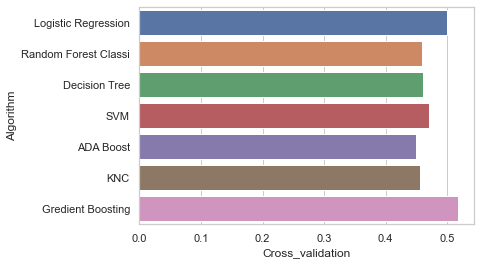

In [193]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

### Gredient Boost Classifier Has the best performance

In [194]:
col = ['Experience', 'Rating','MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology ', 'MS - ENT', 'MD - Dermatology', 'MD - Homeopathy',
       'MD - Ayurveda Medicine',
       'DHMS (Diploma in Homeopathic Medicine and Surgery)',
       'MDS - Oral & Maxillofacial Surgery', 'MD - General Medicine',
       'MS - Otorhinolaryngology',
       'MDS - Conservative Dentistry & Endodontics', 'DDVL', 'MD - Physician',
       'MDS - Prosthodontics', 'DNB - Dermatology & Venereology',
       'Diploma in Otorhinolaryngology (DLO)',
       'MDS - Prosthodontist And Crown Bridge', 'HSR Layout', 'Andheri West',
       'Dwarka', 'Banjara Hills', 'Mulund West', 'Borivali West',
       'Kandivali West', 'Indiranagar', 'Malad West', 'Whitefield',
       'Malleswaram', 'Pitampura', 'Andheri East', 'Vileparle West', 'Powai',
       'Jubilee Hills', 'Bannerghatta Road', 'Marathahalli', 'Kondapur',
       'Bandra West', 'Profile_Dentist', 'Profile_Dermatologists',
       'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath', 'City_ Chennai', 'City_ Coimbatore', 'City_ Delhi',
       'City_ Ernakulam', 'City_ Hyderabad', 'City_ Mumbai', 'City_ Sector 5',
       'City_ Thiruvananthapuram']

<AxesSubplot:>

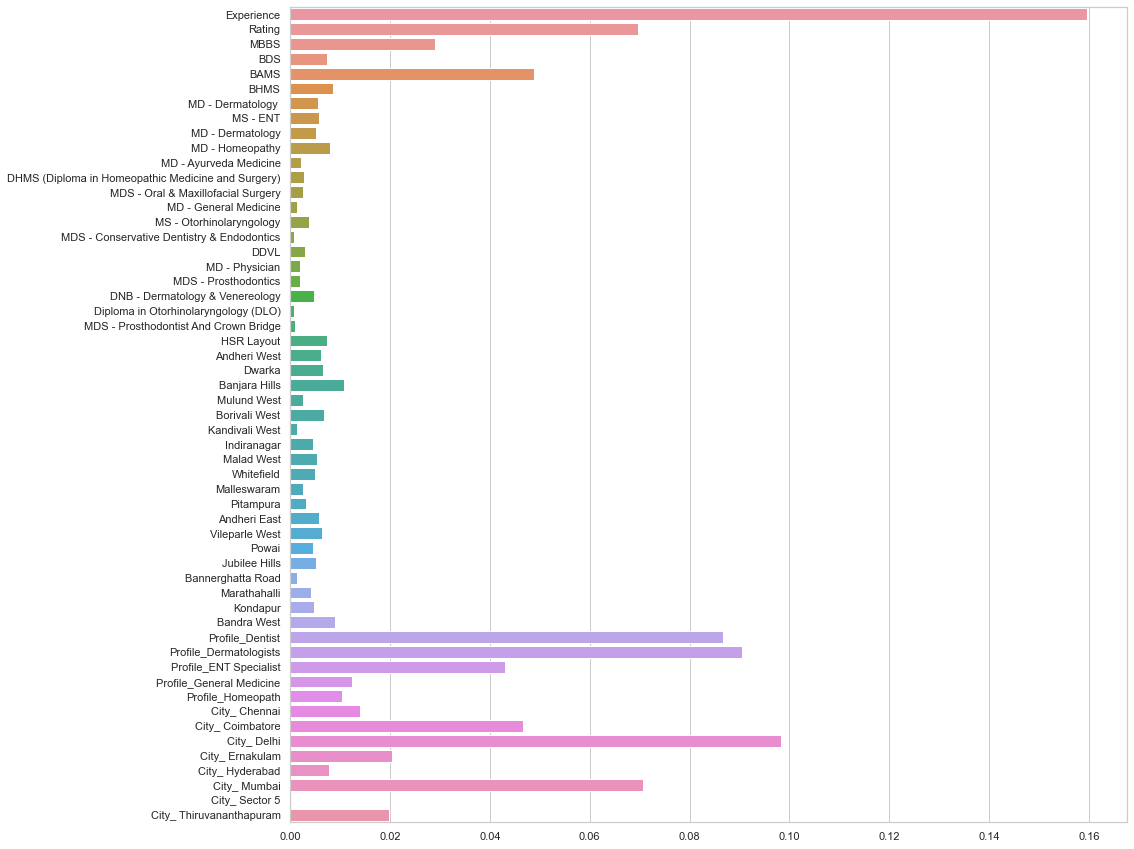

In [195]:
plt.figure(figsize=(15,15))
sns.barplot(y=col,x=mod_8.feature_importances_)

##### So we can clearly observe that  Experience is turning out to be the most useful feature in predicting Doctor Fees

### Hyperparametric Tuning

#### Grid Search Cv

In [196]:
from sklearn.model_selection import GridSearchCV

In [197]:
loss=["deviance","exponential"]
criterion = ["friedman_mse","mse","mae"]

In [198]:
parameters = {
    "loss":loss,
    "criterion":criterion
}

In [199]:
print(parameters)

{'loss': ['deviance', 'exponential'], 'criterion': ['friedman_mse', 'mse', 'mae']}


In [200]:
es = GradientBoostingClassifier()

In [201]:
grid_search=GridSearchCV(estimator=es,param_grid=parameters,cv=3,n_jobs=-1,verbose=2)

In [202]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   14.2s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.9min finished


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['deviance', 'exponential']},
             verbose=2)

#### Best Estimators

In [203]:
grid_search.best_estimator_

GradientBoostingClassifier()

#### Best Parameters

In [204]:
grid_search.best_params_

{'criterion': 'friedman_mse', 'loss': 'deviance'}

#### Best Score

In [205]:
grid_search.best_score_

0.495919908865427

In [206]:
predictions = grid_search.predict(X_test)

#### Confusion Matrix

In [207]:
print(confusion_matrix(y_test,predictions))
print("\n")

[[496 108  50   4   1]
 [186 219  38   1   1]
 [105  91  79   4   0]
 [ 28  20  29   7   0]
 [  4   0   0   0   0]]




#### Classification Report

In [208]:
print(classification_report(y_test,predictions))
print("\n")

              precision    recall  f1-score   support

           0       0.61      0.75      0.67       659
           1       0.50      0.49      0.50       445
           3       0.40      0.28      0.33       279
           4       0.44      0.08      0.14        84
           5       0.00      0.00      0.00         4

    accuracy                           0.54      1471
   macro avg       0.39      0.32      0.33      1471
weighted avg       0.52      0.54      0.52      1471





In [209]:
grid_search

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['deviance', 'exponential']},
             verbose=2)

## Saving the model using Pickle

In [210]:
import pickle

In [211]:
with open("model_pickle","wb") as f:
    
    pickle.dump(grid_search,f)

In [212]:
with open("model_pickle","rb") as f:
    
    fee = pickle.load(f)

## Conclusion

In [213]:
df.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram
0,24,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,12,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Conditions for classification of target variable
- 0 = 0 - 200
- 1 = 200 - 400
- 2 = 400 - 600
- 3 = 600 - 800
- 4 = > 800 

Fees of the doctor should be between (0 - 200) so the output should be 0

In [214]:
df.iloc[0,0:].values

array([24, 10,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  0], dtype=int32)

In [215]:
fee.predict(sc.transform([[24, 10,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  0]]))

array([0])

The model predicted right value

### The model predicted right for this individual value

In [216]:
cm = confusion_matrix(y_test,predictions)

<AxesSubplot:>

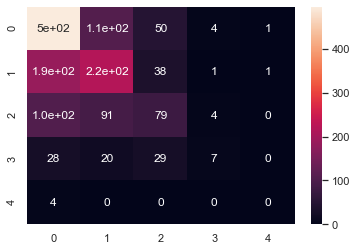

In [217]:
sns.heatmap(data=cm,annot=True)

In [218]:
# Comparing predicted value vs actual value
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [3 0]
 [1 0]
 ...
 [1 3]
 [0 0]
 [1 1]]


In [219]:
df.head()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,MD - Dermatology,MD - Homeopathy,MD - Ayurveda Medicine,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - General Medicine,MDS - Oral & Maxillofacial Surgery,MS - Otorhinolaryngology,MDS - Conservative Dentistry & Endodontics,DDVL,MD - Physician,MDS - Prosthodontics,DNB - Dermatology & Venereology,Diploma in Otorhinolaryngology (DLO),MDS - Prosthodontist And Crown Bridge,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram
0,24,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,12,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [220]:
df.iloc[2,0:].values

array([9, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [221]:
fee.predict(sc.transform([[9, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

array([1])

## Test Dataset

In [222]:
df_test = pd.read_excel("Final_Test.xlsx")

In [223]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


## Data Cleaning

##### Creating data cleaning steps

In [224]:
# Lets use the split() method in order to split the numerical value from string

df_test["Experience"] = df_test["Experience"].str.split().str[0]
# The "Experience" column still has an object data type lets convert it to int

df_test["Experience"] = df_test["Experience"].astype(int) 
# Lets remove the "%" sign from "Rating column"

df_test["Rating"] = df_test["Rating"].str.split("%").str[0]
# Lets replace all the Nan values in "Rating" with 0

df_test['Rating'] = df_test['Rating'].fillna(0)
# we need to convert the "Rating" column to int datatype

df_test["Rating"] = df_test["Rating"].astype(int) 
# slicing the "Qualification" column

df_test["Qualification"] = df_test["Qualification"].str.split(",").str[0]
# Lets Drop the "Miscellaneous_Info" column

df_test = df_test.drop("Miscellaneous_Info",axis=1)
# Lets create a new column name "Location" and extract the location from the place column 

df_test["Location"] = df_test["Place"].str.split(",").str[0]
# Lets create a new column name "City" and extract the City from the place column 

df_test["City"] = df_test["Place"].str.split(",").str[1]
# Now the place column is of no use lets drop the place column

df_test  = df_test.drop("Place",axis=1)
# Replacing the missing values in "Location" and "City" column with Mode()

df_test['Location'].fillna(df_test['Location'].mode()[0], inplace=True)

df_test['City'].fillna(df_test['City'].mode()[0], inplace=True)

In [225]:
df_test.head()

,Qualification,Experience,Rating,Profile,Location,City
0,MBBS,35,0,General Medicine,Ghatkopar East,Mumbai
1,MBBS,31,0,ENT Specialist,West Marredpally,Hyderabad
2,MBBS,40,70,Dermatologists,KK Nagar,Chennai
3,BAMS,0,0,Ayurveda,New Ashok Nagar,Delhi
4,BDS,16,100,Dentist,Kanakpura Road,Bangalore


In [226]:
df_test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Location         0
City             0
dtype: int64

In [227]:
# Lets make a list of the most frequent categories in the variable "Qualification"
quali_20 = [x for x in df_test["Qualification"].value_counts().sort_values(ascending=False).head(20).index]
# Lets make 20 binary variables
for lab in quali_20:
    
    df_test[lab] = np.where(df_test["Qualification"] == lab,1 ,0)

# Lets drop the "Qualification" column now
df_test = df_test.drop("Qualification",axis=1)

# Lets make 20 binary variables for location
for loc in loc_20:
    
    df_test[loc] = np.where(df_test["Location"] == loc,1 ,0)
loc_dummy = df_test[["Location"] + loc_20].head(20)
# Droping location column
df_test = df_test.drop("Location",axis=1)
# Creating rating intervals
criteria = [df_test['Rating'].between(0, 10),df_test['Rating'].between(11, 20),
           df_test['Rating'].between(21, 30),df_test['Rating'].between(31, 40),
           df_test['Rating'].between(41, 50),df_test['Rating'].between(51, 60),
           df_test['Rating'].between(61, 70),df_test['Rating'].between(71, 80),
           df_test['Rating'].between(81, 90),df_test['Rating'].between(91, 100)]

values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df_test['Rating'] = np.select(criteria, values)

In [228]:
df_test.head()

,Experience,Rating,Profile,City,MBBS,BDS,BHMS,BAMS,MD - Homeopathy,MS - ENT,MD - Dermatology,MD - General Medicine,MS - Otorhinolaryngology,DDVL,MD - Ayurveda Medicine,MDS - Oral & Maxillofacial Surgery,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - Dermatology,MDS - Conservative Dentistry & Endodontics,MDS - Prosthodontist And Crown Bridge,B.Sc,MDS - Orthodontics,Diploma in Otorhinolaryngology (DLO),Get inspired by remarkable stories of people like you,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West
0,35,1,General Medicine,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,ENT Specialist,Hyderabad,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,40,7,Dermatologists,Chennai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,Ayurveda,Delhi,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,10,Dentist,Bangalore,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [229]:
df_test["City"].value_counts()

 Bangalore             426
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Name: City, dtype: int64

In [230]:
df_test.shape

(1987, 44)

In [232]:
df_test["Profile"].nunique()

6

In [233]:
df_test["City"].nunique()

8

In [234]:
df.shape

(5883, 56)

In [235]:
df_test = pd.get_dummies(data=df_test,drop_first=True)

In [251]:
df_test.head()

,Experience,Rating,MBBS,BDS,BHMS,BAMS,MD - Homeopathy,MS - ENT,MD - Dermatology,MD - General Medicine,MS - Otorhinolaryngology,DDVL,MD - Ayurveda Medicine,MDS - Oral & Maxillofacial Surgery,DHMS (Diploma in Homeopathic Medicine and Surgery),MD - Dermatology,MDS - Conservative Dentistry & Endodontics,MDS - Prosthodontist And Crown Bridge,B.Sc,MDS - Orthodontics,Diploma in Otorhinolaryngology (DLO),Get inspired by remarkable stories of people like you,HSR Layout,Andheri West,Dwarka,Banjara Hills,Mulund West,Borivali West,Kandivali West,Indiranagar,Whitefield,Malad West,Malleswaram,Pitampura,Andheri East,Vileparle West,Powai,Jubilee Hills,Marathahalli,Bannerghatta Road,Ghatkopar East,Bandra West,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,City_ Chennai,City_ Coimbatore,City_ Delhi,City_ Ernakulam,City_ Hyderabad,City_ Mumbai,City_ Sector 5,City_ Thiruvananthapuram
0,35,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,31,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,40,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,16,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Predicting results for the test data using saved model 

In [252]:
test_df = df_test.values

In [253]:
test_df

array([[35,  1,  1, ...,  1,  0,  0],
       [31,  1,  1, ...,  0,  0,  0],
       [40,  7,  1, ...,  0,  0,  0],
       ...,
       [ 9,  1,  1, ...,  0,  0,  0],
       [12, 10,  0, ...,  0,  0,  0],
       [ 8,  1,  1, ...,  0,  0,  0]], dtype=int64)

In [254]:
predict = fee.predict(test_df)

In [255]:
predict

array([0, 1, 1, ..., 0, 0, 1])

Conditions for classification of target variable
- 0 = 0 - 200
- 1 = 200 - 400
- 2 = 400 - 600
- 3 = 600 - 800
- 4 = > 800 